<a href="https://colab.research.google.com/github/arunsoldev/NSL/blob/main/Neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import functools
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
def tensor_to_image(tensor):
  tensor=np.array(tensor*255,dtype=np.uint8)

  if np.ndim(tensor)>3:
    tensor=tensor[0]
  else:
    raise Exception()
  return PIL.Image.fromarray(tensor)




In [ ]:
def load_image(image_path):
  max_res=512

  image=tf.io.read_file(image_path)
  image=tf.image.decode_image(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  shape=tf.cast(tf.shape(image)[:-1],tf.float32)
  long_side=max(shape)
  scaling_factor=max_res/long_side
  new_shape=tf.cast(shape*scaling_factor,tf.int32)
  image=tf.image.resize(image,new_shape)
  image=image[tf.newaxis,:]
  return image


In [ ]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [ ]:
# Function to apply style transfer with adjustable strength
import gradio as gr

def stylize(content_img, style_img, style_strength=1.0, save=False):
    content_tensor = load_image(content_img)
    style_tensor = load_image(style_img)

    # Style Transfer with Strength Control
    stylized_image = model(tf.constant(content_tensor), tf.constant(style_tensor))[0]

    # Blend content and style based on the strength slider
    output_image = (1 - style_strength) * content_tensor + (style_strength) * stylized_image
    output_image = tensor_to_image(output_image)

    if save:
        save_image(output_image)

    return output_image

# Function to save output image
def save_image(image, filename="stylized_output.jpg"):
    image.save(filename)
    print(f"Stylized image saved as {filename}")

# Function to display images side by side
def show_images(content, style, output):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(PIL.Image.open(content))
    ax[0].set_title("Content Image")
    ax[0].axis("off")

    ax[1].imshow(PIL.Image.open(style))
    ax[1].set_title("Style Image")
    ax[1].axis("off")

    ax[2].imshow(output)
    ax[2].set_title("Stylized Output")
    ax[2].axis("off")

    plt.show()

# Gradio UI for Image Selection
iface = gr.Interface(
    fn=stylize,
    inputs=[
        gr.Image(type="filepath", label="Upload Content Image"),
        gr.Image(type="filepath", label="Upload Style Image"),
        gr.Slider(0.1, 1.0, step=0.1, value=1.0, label="Style Strength"),
        gr.Checkbox(label="Save Output")
    ],
    outputs=gr.Image(label="Stylized Image"),
    title="Neural Style Transfer",
    description="Upload a content image and a style image, adjust style strength, and apply style transfer using TensorFlow Hub."
)

# Run UI
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6e1df536011cfb767b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# style image and content image
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
content_path1 = tf.keras.utils.get_file('GoldenGateBridge.jpg', 'https://upload.wikimedia.org/wikipedia/commons/0/0c/GoldenGateBridge-001.jpg')
content_path2 = tf.keras.utils.get_file('EiffelTower.jpg', 'https://upload.wikimedia.org/wikipedia/commons/a/a8/Tour_Eiffel_Wikimedia_Commons.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
style_path4 = tf.keras.utils.get_file('PersistenceOfMemory.jpg', 'https://upload.wikimedia.org/wikipedia/en/d/dd/The_Persistence_of_Memory.jpg')
style_path5 = tf.keras.utils.get_file('MonaLisa.jpg', 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg')

83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
3108075/3108075 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5279797/5279797 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
195196/195196 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
50920/50920 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
94310471/94310471 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
stylized_image=model(tf.constant(load_image(content_path2)),tf.constant(load_image(style_path4)))[0]

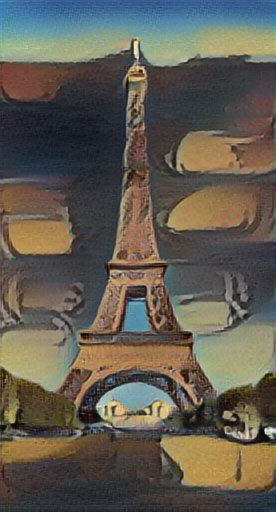

In [ ]:
tensor_to_image(stylized_image)